## Happiness by Median Income using The World Happiness Report 

Author: Munna R. Shainy [[Find me on LinkedIn]](https://www.linkedin.com/in/munna-rs)

Year: 2025

This is a workbook where I used the Happiness and World Bank Income inequality Gini measure combined by J.Ward [Dataset available [here](https://www.openml.org/search?type=data&sort=runs&id=40916&status=active)] during my learning at Foundations of Data Science: K-Means Clustering in Python 

I have created some very basic visualisations and employed the k-means clustering algorithm on this dataset. I have considered the variables: Happiness Score, GDP, median income and country.

In [83]:
import pandas as pd
data = pd.read_csv('happyscore_income.csv') #loading dataset

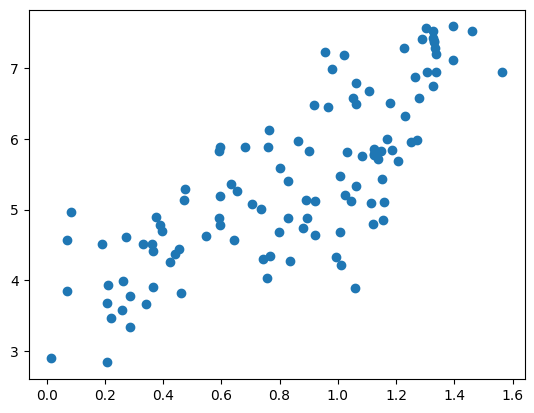

In [84]:
happy = data['happyScore']
gdp = data['GDP']
plt.scatter(gdp, happy)

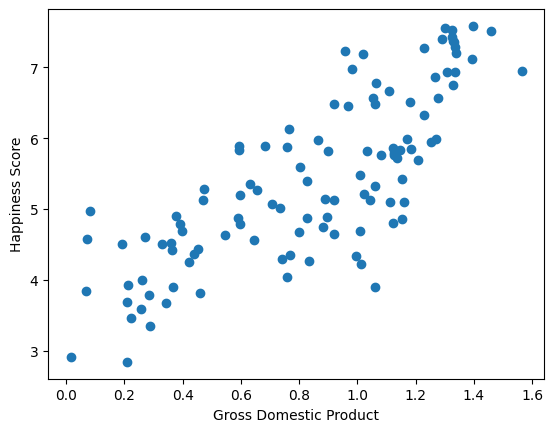

In [69]:
#repeating with labels

plt.xlabel("Gross Domestic Product")
plt.ylabel("Happiness Score")
plt.scatter(gdp, happy)

In [70]:
#sorting values by column
data.sort_values('GDP', inplace=True)
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
32,Ethiopia,33.0,4.2,2.25,1050.720,857.16,33.170000,'Sub-Saharan Africa',4.512,0.19073,Ethiopia
...,...,...,...,...,...,...,...,...,...,...,...
3,Austria,59.0,7.2,2.11,19457.040,16879.62,30.296250,'Western Europe',7.200,1.33723,Austria
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway


In [71]:
high_gdp = data[data['GDP']> 0.5]
high_gdp

high_gdp.iloc[0] #lowest in high_gdp category

country                                 Ghana
adjusted_satisfaction                    41.0
avg_satisfaction                          5.4
std_satisfaction                         2.45
avg_income                            1577.04
median_income                         1148.28
income_inequality                       42.77
region                   'Sub-Saharan Africa'
happyScore                              4.633
GDP                                   0.54558
country.1                               Ghana
Name: 38, dtype: object

In [72]:
high_gdp.iloc[-1] #highest in high_gdp category

country                        Luxembourg
adjusted_satisfaction                66.0
avg_satisfaction                      7.7
std_satisfaction                     1.76
avg_income                      26182.275
median_income                    22240.23
income_inequality                   31.95
region                   'Western Europe'
happyScore                          6.946
GDP                               1.56391
country.1                      Luxembourg
Name: 61, dtype: object

Mean GDP of highest gdp countries: 1.0260642168674698
Mean GDP of all countries: 0.8419090990990991


Text(1.56391, 6.946000000000001, 'Luxembourg')

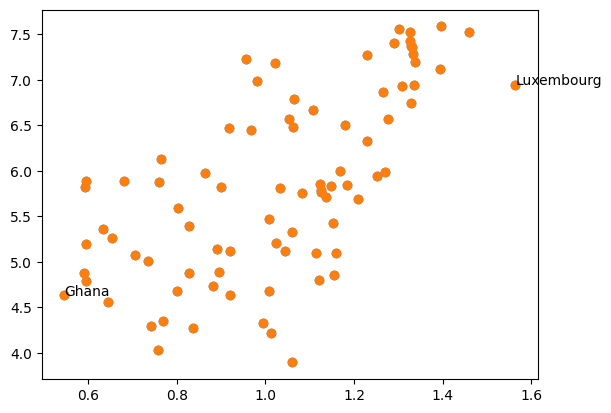

In [73]:
import numpy as np
print("Mean GDP of highest gdp countries:", np.mean(high_gdp['GDP'])) #average GDP of high GDP countries
print("Mean GDP of all countries:", np.mean(data['GDP']))

plt.scatter(high_gdp['GDP'], high_gdp['happyScore'])

#Labelling points on the graph

plt.scatter(high_gdp['GDP'], high_gdp['happyScore'])
plt.text(high_gdp.iloc[0]['GDP'],
        high_gdp.iloc[0]['happyScore'],
        high_gdp.iloc[0]['country'])


plt.text(high_gdp.iloc[-1]['GDP'],
        high_gdp.iloc[-1]['happyScore'],
        high_gdp.iloc[-1]['country'])

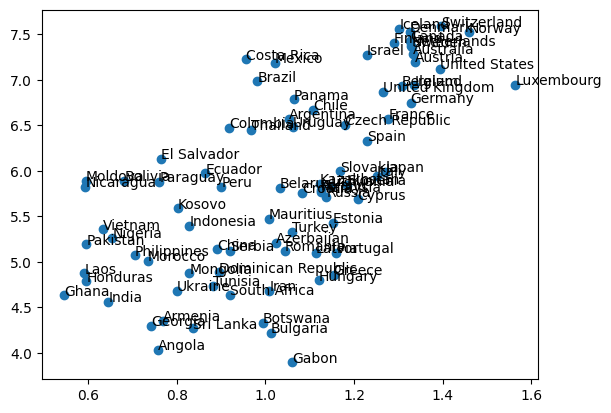

In [74]:
plt.scatter(high_gdp['GDP'], high_gdp['happyScore'])
for k, row in high_gdp.iterrows():
    plt.text(row['GDP'],
            row['happyScore'],
            row['country'])

#With a bigger dataset, labelling everything would make it unintelligible

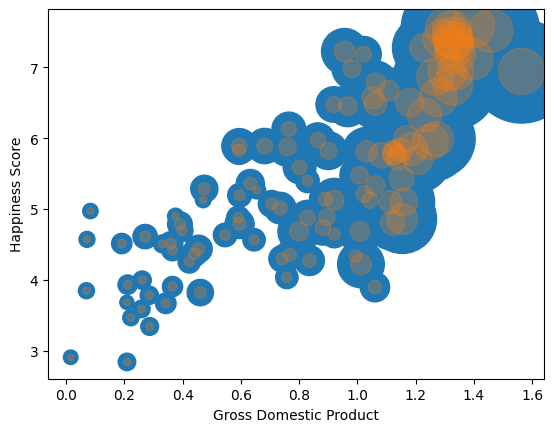

In [75]:
happy = data['happyScore']
gdp = data['GDP']
med_income = data['median_income']

plt.xlabel("Gross Domestic Product")
plt.ylabel("Happiness Score")
plt.scatter(gdp, happy, s=med_income*0.25) #here s is for having the size of data points be scaled to med_income. You rescale it by *0.5, *10 times or whatever, based on your need

#this is creating blobs of circles, and we do not know the differences. So just set transparency

plt.xlabel("Gross Domestic Product")
plt.ylabel("Happiness Score")
plt.scatter(gdp, happy, s=med_income*0.05, alpha=0.25)

           country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
65      Madagascar                   33.0               3.7              1.86   
10         Burundi                   25.0               2.9              1.96   
72      Mozambique                   34.0               3.8              1.76   
109         Zambia                   37.0               5.0              2.61   
58         Liberia                   37.0               4.4              2.02   
..             ...                    ...               ...               ...   
3          Austria                   59.0               7.2              2.11   
105  United States                   62.0               7.3              1.92   
17     Switzerland                   70.0               8.0              1.62   
77          Norway                   70.0               8.0              1.62   
61      Luxembourg                   66.0               7.7              1.76   

     avg_income  median_inc

Text(0, 0.5, 'Happiness Index Score')

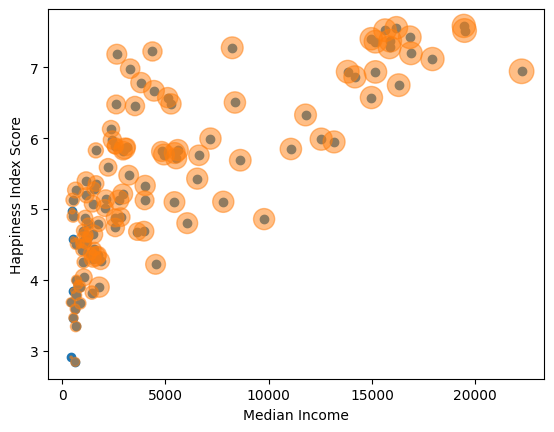

In [76]:
import pandas as pd
data = pd.read_csv('happyscore_income.csv') #loading dataset

#Instead of avg_income, I am choosing median_income as it will provide the midpoint of a frequency distribution of values
data.sort_values('median_income', inplace=True) #sorting dataset by median incomes
print(data) #displays top 5 and lowest 5 income (by median_score) countries

happy = data['happyScore'] #happiness index score
med_income = data['median_income'] #median income of the country

#Basic plot
import matplotlib.pyplot as plt
plt.scatter(med_income, happy) #
plt.xlabel("Median Income")
plt.ylabel("Happiness Index Score")

#Updating the above plot with a third dimension: the code lines below will superimpose over the above plot
gdp = data['GDP'] #Gross Domestic Product

plt.scatter(med_income, happy, s=gdp*200, alpha=0.5) #scaling it by 200 for better visibility and setting transperancy 
plt.xlabel("Median Income")
plt.ylabel("Happiness Index Score")

# KMeans Clustering

[[0.39753 4.694  ]
 [0.64499 4.565  ]
 [0.59066 4.876  ]
 [0.35997 4.514  ]]
[[0.539622   4.3726    ]
 [1.12083333 6.07066667]
 [0.72430714 5.13085714]]


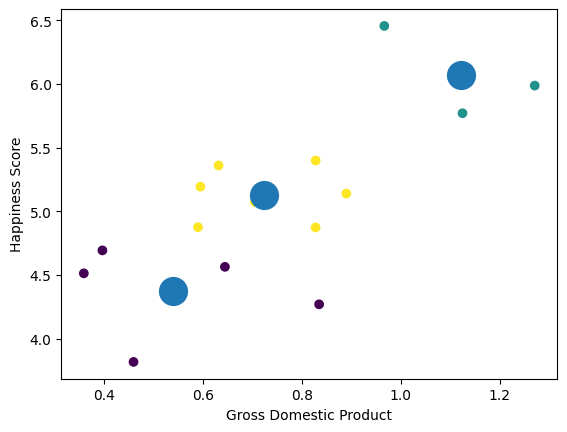

In [82]:
from sklearn.cluster import KMeans

gdp_happy = np.column_stack((gdp,happy)) #stacking GDP and Happiness Scores data
print(gdp_happy[0:4]) #only printing the first 5 rows

kmean_result = KMeans(n_clusters=3).fit(gdp_happy) #deploying K-Means algorithm with 3 clusters

print(kmean_result.cluster_centers_)


#array([[0.93366366, 5.4922439 ],  low gdp-high happiness
#       [0.47558634, 4.22695122], lower gdp-fairly high happiness
#       [1.23009172, 7.01189655]]) high gdp-highest happiness

# Plotting happiness scores by GDP
plt.scatter(gdp, happy, c=kmean_result.labels_)
plt.xlabel("Gross Domestic Product")
plt.ylabel("Happiness Score")

# Plotting with Cluster centers (x = column 0, y = column 1)
cluster = kmean_result.cluster_centers_
plt.scatter(cluster[:, 0], cluster[:, 1], s=400) # s=400 gives center points bigger

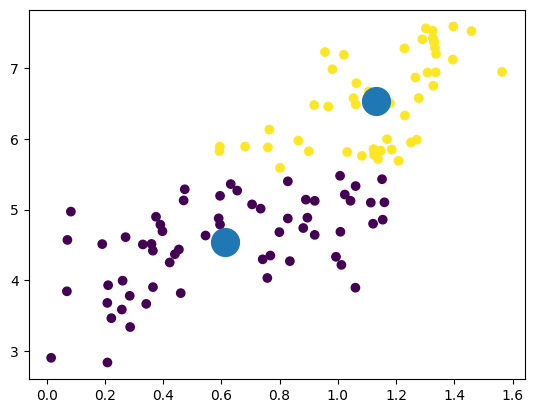

In [78]:
## redo with 2 clusters
kmean_result = KMeans(n_clusters=2).fit(gdp_happy)

# Original scatter of points
plt.scatter(gdp, happy, c=kmean_result.labels_)

# Cluster centers (x = column 0, y = column 1)
cluster = kmean_result.cluster_centers_
plt.scatter(cluster[:, 0], cluster[:, 1], s=400) # s=400 gives center points bigger

In [79]:
#Instead of avg_income, I am choosing median_income as it will provide the midpoint of a frequency distribution of values
data.sort_values('median_income', inplace=True) #sorting dataset by median incomes
data = data[data['region'].str.contains("Asia")] #filtering only countries which are in the Asian continent using the keyword: 'Asia'
print(data) #displays top 5 and lowest 5 income (by median_score) countries
happy = data['happyScore'] #happiness index score
med_income = data['median_income'] #median income of the country

         country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
6     Bangladesh                   43.0               5.3              2.10   
46         India                   45.0               5.5              2.13   
56          Laos                   55.0               6.2              1.72   
78         Nepal                   48.0               5.3              1.65   
43     Indonesia                   50.0               6.1              2.14   
82      Pakistan                   45.0               6.0              2.72   
53      Cambodia                   40.0               4.9              2.12   
81   Philippines                   53.0               7.0              2.66   
107      Vietnam                   53.0               6.1              1.77   
57     Sri Lanka                   42.0               5.1              2.07   
20         China                   48.0               6.2              2.43   
67      Mongolia                   44.0             

Text(0, 0.5, 'Happiness Index Score')

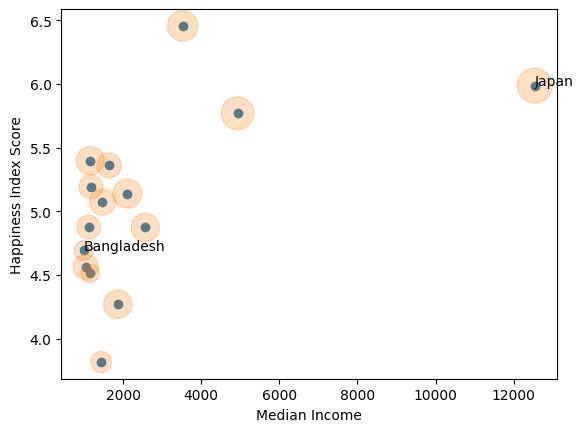

In [80]:
#Basic plot
import matplotlib.pyplot as plt
plt.scatter(med_income, happy) #
plt.xlabel("Median Income")
plt.ylabel("Happiness Index Score")
plt.text(data.iloc[0]['median_income'], #highest median_income labelled: Bangladesh
data.iloc[0]['happyScore'],
data.iloc[0]['country'])
plt.text(data.iloc[-1]['median_income'], #lowest median_income[-1]labelled: Japan
data.iloc[-1]['happyScore'],
data.iloc[-1]['country'])

#Updating the above plot with a third dimension: the code lines below will superimpose over the above plot
gdp = data['GDP'] #Gross Domestic Product
plt.scatter(med_income, happy, s=gdp*500, alpha=0.25) #scaling it by 500 for better visibility and setting transparency
plt.xlabel("Median Income")
plt.ylabel("Happiness Index Score")